In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

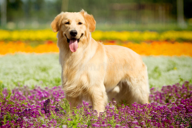

In [4]:
im = PILImage.create("dog.jpeg")
im.thumbnail((192, 192))
im

In [5]:
#|export
learn = load_learner("model.pkl")

In [7]:
%time learn.predict(im)

CPU times: user 351 ms, sys: 200 ms, total: 551 ms
Wall time: 133 ms


('False', TensorBase(0), TensorBase([9.9999e-01, 7.8021e-06]))

In [8]:
#|export
categories = ['Bathroom', 'Bedroom', 'Floor plan', 'Front', 'Kitchen', 'Living room', 'Parking', 'Porch', 'Swimming pool', 'Views', 'Yard']

def classify_img(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))


In [9]:
classify_img(im)

{'Dog': 0.9999922513961792, 'Cat': 7.80213395046303e-06}

In [11]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ["dog.jpeg", "cat.jpeg", "dunno.jpeg"]

intf = gr.Interface(fn=classify_img, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x188daa320>, 'http://127.0.0.1:7860/', None)

In [16]:
import nbdev
nbdev.export.nb_export('app.ipynb', ".")
print('Export successful')

Export successful
